# **Group 8 Assignment 4**

## **Import Important Libraries and load the dataset**

In [ ]:
import pandas as pd #for working with dataframes
import numpy as np #to deal with arrays
import matplotlib.pyplot as plt #for plotting
import seaborn as sns
%matplotlib inline

In [ ]:
columns = ['pixel ' + str(i) for i in range(17)]
columns[-1] = 'label'
#load the train dataset
train = pd.read_csv('/content/pendigits-tra.csv',names=columns)
train.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,label
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [ ]:
#get some information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pixel 0   7494 non-null   int64
 1   pixel 1   7494 non-null   int64
 2   pixel 2   7494 non-null   int64
 3   pixel 3   7494 non-null   int64
 4   pixel 4   7494 non-null   int64
 5   pixel 5   7494 non-null   int64
 6   pixel 6   7494 non-null   int64
 7   pixel 7   7494 non-null   int64
 8   pixel 8   7494 non-null   int64
 9   pixel 9   7494 non-null   int64
 10  pixel 10  7494 non-null   int64
 11  pixel 11  7494 non-null   int64
 12  pixel 12  7494 non-null   int64
 13  pixel 13  7494 non-null   int64
 14  pixel 14  7494 non-null   int64
 15  pixel 15  7494 non-null   int64
 16  label     7494 non-null   int64
dtypes: int64(17)
memory usage: 995.4 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


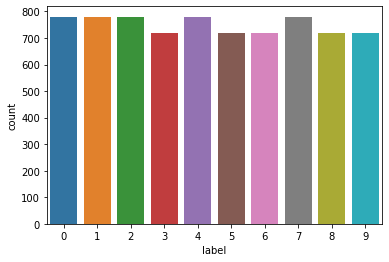

In [ ]:
#count the numbers occurrence in label column
sns.countplot(train['label'])

In [ ]:
#split the data into x_train and y_train
x_train = train.drop('label',axis= 1)
y_train = train['label']

In [ ]:
columns = ['pixel ' + str(i) for i in range(17)]
columns[-1] = 'label'
#load the test dataset
test = pd.read_csv('/content/pendigits-tes.csv',names=columns)
test.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,label
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


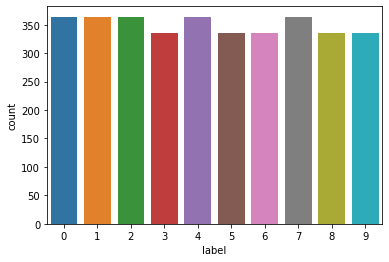

In [ ]:
#count the numbers occurrence in label column
sns.countplot(test['label'])

In [ ]:
#split the test dataset into x_test and y_test
x_test = test.drop('label',axis= 1)
y_test = test['label']

## **Train the Decision Tree classification Model** 

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
from sklearn.tree import DecisionTreeClassifier #for DT model
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [ ]:
#print accuracy of DT model 
print('Accuracy ', accuracy_score(y_test,y_pred))

Accuracy  0.9208118925100057


In [ ]:
#print classification report of DT model 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       363
           1       0.87      0.88      0.88       364
           2       0.88      0.95      0.92       364
           3       0.89      0.94      0.91       336
           4       0.91      0.97      0.94       364
           5       0.94      0.84      0.89       335
           6       0.95      0.95      0.95       336
           7       0.95      0.85      0.90       364
           8       0.94      0.94      0.94       336
           9       0.95      0.92      0.94       336

    accuracy                           0.92      3498
   macro avg       0.92      0.92      0.92      3498
weighted avg       0.92      0.92      0.92      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


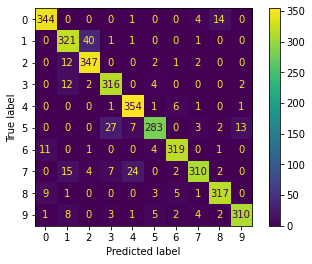

In [ ]:
#print confusion matrix of DT model 
plot_confusion_matrix(dt,x_test,y_test)

## **Train SVM model**

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

In [ ]:
from sklearn.svm import SVC
#train SVM model
svm = SVC(random_state=0)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [ ]:
#print accuracy score for SVM model
print('Accuracy ', accuracy_score(y_test,y_pred))

Accuracy  0.9817038307604345


In [ ]:
#print classification model for SVM model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       363
           1       0.95      0.96      0.96       364
           2       0.96      0.99      0.98       364
           3       0.99      0.99      0.99       336
           4       1.00      0.99      0.99       364
           5       0.99      0.98      0.98       335
           6       1.00      1.00      1.00       336
           7       0.99      0.95      0.97       364
           8       0.97      1.00      0.98       336
           9       0.98      0.98      0.98       336

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


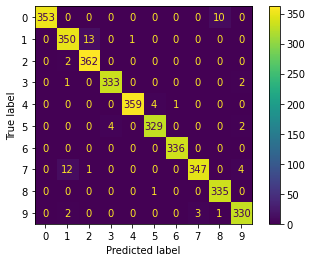

In [ ]:
#print confusion matrix for SVM model
plot_confusion_matrix(svm,x_test,y_test)

## **Apply Hard and soft Voting Classifiers**

Hard voting entails picking the prediction with the highest number of votes.

soft voting entails combining the probabilities of each prediction in each model and picking the prediction with the highest total probability.

In [ ]:
from sklearn.ensemble import VotingClassifier
#train the hard voting classifier
hard_votting = VotingClassifier(estimators=[('dt', dt), ('svm', svm)], voting='hard')
hard_votting.fit(x_train, y_train)
y_pred = hard_votting.predict(x_test)

In [ ]:
#print accuracy score of hard voting classifier
print('Accuracy ', accuracy_score(y_test,y_pred))

Accuracy  0.9405374499714122


In [ ]:
#print classification report of hard voting classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       363
           1       0.85      0.97      0.91       364
           2       0.95      0.96      0.96       364
           3       0.89      0.95      0.92       336
           4       0.93      0.99      0.96       364
           5       0.95      0.89      0.92       335
           6       0.97      0.95      0.96       336
           7       0.98      0.85      0.91       364
           8       0.97      0.94      0.95       336
           9       0.99      0.92      0.95       336

    accuracy                           0.94      3498
   macro avg       0.94      0.94      0.94      3498
weighted avg       0.94      0.94      0.94      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


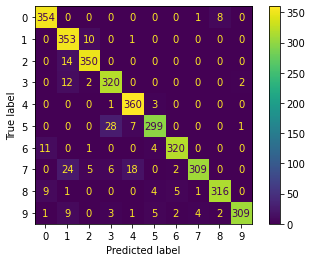

In [ ]:
#print aconfusion matrix of hard voting classifier
plot_confusion_matrix(hard_votting,x_test,y_test)

### **Apply Soft Voting Classifier**

In [ ]:
#train the soft voting classifier
svm = SVC(probability=True)
soft_votting = VotingClassifier(estimators=[('dt', dt), ('svm', svm)], voting='soft')
soft_votting.fit(x_train, y_train)
y_pred = soft_votting.predict(x_test)

In [ ]:
#print accuracy score of soft voting classifier
print('Accuracy ', accuracy_score(y_test,y_pred))

Accuracy  0.9208118925100057


In [ ]:
#print classification report of soft voting classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       363
           1       0.87      0.88      0.88       364
           2       0.88      0.95      0.92       364
           3       0.89      0.94      0.91       336
           4       0.91      0.97      0.94       364
           5       0.94      0.84      0.89       335
           6       0.95      0.95      0.95       336
           7       0.95      0.85      0.90       364
           8       0.94      0.94      0.94       336
           9       0.95      0.92      0.94       336

    accuracy                           0.92      3498
   macro avg       0.92      0.92      0.92      3498
weighted avg       0.92      0.92      0.92      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


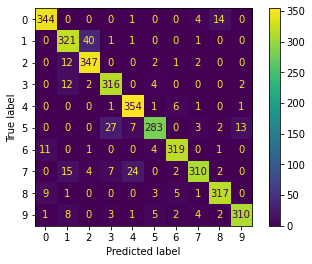

In [ ]:
#print aconfusion matrix of soft voting classifier
plot_confusion_matrix(soft_votting,x_test,y_test)

## **Apply Bagging Classifier**

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

Accuracy  0.9514008004574043
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       363
           1       0.90      0.93      0.91       364
           2       0.93      0.98      0.95       364
           3       0.94      0.98      0.96       336
           4       0.95      0.98      0.96       364
           5       0.97      0.90      0.93       335
           6       0.99      0.97      0.98       336
           7       0.98      0.89      0.93       364
           8       0.94      0.98      0.96       336
           9       0.96      0.95      0.95       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9528301886792453
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       363
           1       0.89      0.92      0.91       364
           2       0.93      0.98      0.95       364
           3       0.94      0.98      0.96       336
           4       0.96      0.98      0.97       364
           5       0.98      0.90      0.94       335
           6       0.99      0.99      0.99       336
           7       0.98      0.89      0.93       364
           8       0.94      0.98      0.96       336
           9       0.95      0.96      0.95       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9516866781017724
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       363
           1       0.88      0.92      0.90       364
           2       0.92      0.98      0.95       364
           3       0.95      0.98      0.96       336
           4       0.96      0.98      0.97       364
           5       0.97      0.90      0.93       335
           6       0.99      0.98      0.99       336
           7       0.98      0.88      0.93       364
           8       0.93      0.98      0.96       336
           9       0.95      0.96      0.95       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9542595769010863
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       363
           1       0.88      0.93      0.90       364
           2       0.93      0.98      0.95       364
           3       0.97      0.98      0.97       336
           4       0.96      0.98      0.97       364
           5       0.98      0.91      0.94       335
           6       0.99      0.98      0.98       336
           7       0.98      0.89      0.93       364
           8       0.93      0.98      0.96       336
           9       0.95      0.96      0.95       336

    accuracy                           0.95      3498
   macro avg       0.96      0.95      0.95      3498
weighted avg       0.96      0.95      0.95      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9539736992567182
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       363
           1       0.89      0.93      0.91       364
           2       0.92      0.98      0.95       364
           3       0.96      0.98      0.97       336
           4       0.96      0.98      0.97       364
           5       0.97      0.90      0.94       335
           6       0.99      0.99      0.99       336
           7       0.98      0.89      0.93       364
           8       0.94      0.98      0.96       336
           9       0.95      0.95      0.95       336

    accuracy                           0.95      3498
   macro avg       0.96      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


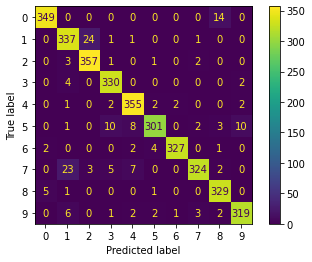

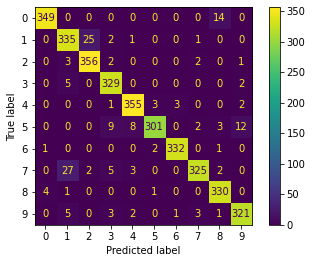

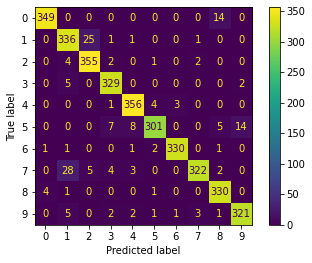

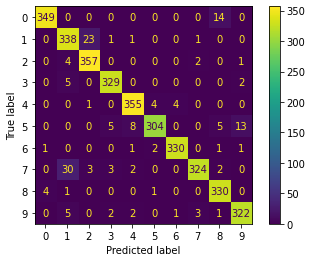

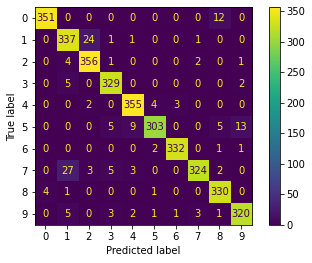

In [ ]:
from sklearn.ensemble import BaggingClassifier
scores =[]
for i in [30,70,100,150,200]:
  ba = BaggingClassifier(n_estimators=i,random_state=0)
  ba.fit(x_train,y_train)
  y_pred = ba.predict(x_test)
  print('Accuracy ', accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  plot_confusion_matrix(ba,x_test,y_test)
  scores.append(accuracy_score(y_test,y_pred))

In [ ]:
scores.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'accuracy')

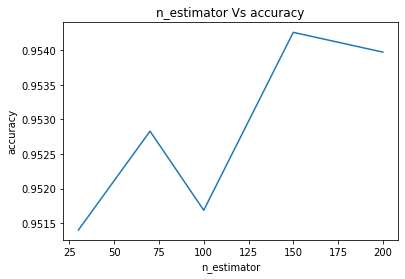

In [ ]:
#plot n_estimator Vs accuracy 
plt.plot([30,70,100,150,200],scores)
plt.title('n_estimator Vs accuracy')
plt.xlabel('n_estimator')
plt.ylabel('accuracy') 

**So, the highest accuracy is at n estimator = 150** 

### **Train bagging classifier with the best number of estimator**

In [ ]:
ba = BaggingClassifier(n_estimators=150,random_state=0)
ba.fit(x_train,y_train)
y_pred = ba.predict(x_test)
print('Accuracy ', accuracy_score(y_test,y_pred))

Accuracy  0.9542595769010863


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       363
           1       0.88      0.93      0.90       364
           2       0.93      0.98      0.95       364
           3       0.97      0.98      0.97       336
           4       0.96      0.98      0.97       364
           5       0.98      0.91      0.94       335
           6       0.99      0.98      0.98       336
           7       0.98      0.89      0.93       364
           8       0.93      0.98      0.96       336
           9       0.95      0.96      0.95       336

    accuracy                           0.95      3498
   macro avg       0.96      0.95      0.95      3498
weighted avg       0.96      0.95      0.95      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


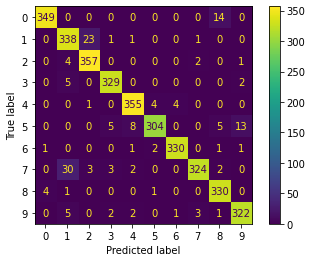

In [ ]:
plot_confusion_matrix(ba,x_test,y_test)

## **Apply Random Forest classifier (additional model)**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Accuracy  0.9622641509433962
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       363
           1       0.91      0.92      0.91       364
           2       0.93      0.98      0.95       364
           3       0.97      0.99      0.98       336
           4       1.00      0.99      1.00       364
           5       1.00      0.94      0.97       335
           6       1.00      1.00      1.00       336
           7       0.98      0.89      0.93       364
           8       0.94      0.99      0.96       336
           9       0.92      0.99      0.95       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9648370497427101
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.92      0.92      0.92       364
           2       0.93      0.99      0.96       364
           3       0.97      0.98      0.98       336
           4       1.00      1.00      1.00       364
           5       1.00      0.94      0.97       335
           6       0.99      1.00      1.00       336
           7       0.99      0.90      0.94       364
           8       0.94      1.00      0.97       336
           9       0.94      0.99      0.96       336

    accuracy                           0.96      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9634076615208691
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       363
           1       0.90      0.92      0.91       364
           2       0.93      0.98      0.96       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       1.00      0.93      0.96       335
           6       1.00      1.00      1.00       336
           7       0.99      0.89      0.94       364
           8       0.94      0.99      0.97       336
           9       0.93      0.99      0.96       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9648370497427101
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       363
           1       0.90      0.92      0.91       364
           2       0.93      0.99      0.95       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       1.00      0.93      0.97       335
           6       1.00      1.00      1.00       336
           7       0.99      0.89      0.94       364
           8       0.95      1.00      0.97       336
           9       0.94      0.99      0.96       336

    accuracy                           0.96      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.965980560320183
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       363
           1       0.90      0.92      0.91       364
           2       0.93      0.99      0.95       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       1.00      0.94      0.97       335
           6       1.00      1.00      1.00       336
           7       0.99      0.90      0.94       364
           8       0.95      1.00      0.97       336
           9       0.95      0.99      0.97       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


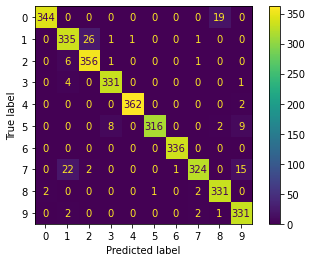

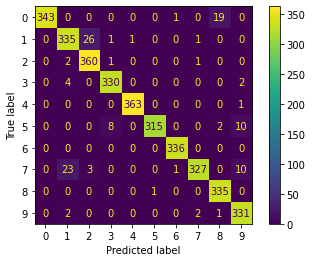

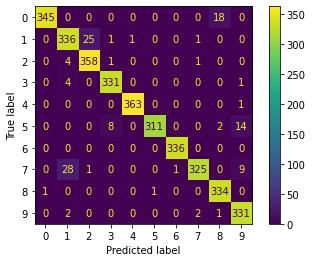

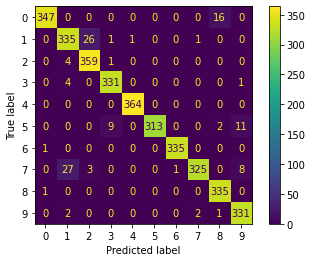

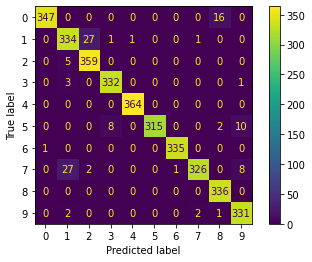

In [ ]:
from sklearn.ensemble import RandomForestClassifier
scores =[]
for i in [30,70,100,150,200]:
  rf = RandomForestClassifier(n_estimators=i,random_state=0)
  rf.fit(x_train,y_train)
  y_pred = rf.predict(x_test)
  #accuracy score for random forest
  print('Accuracy ', accuracy_score(y_test,y_pred))
   #classification report for random forest
  print(classification_report(y_test,y_pred))
   #confusion matrix for random forest
  plot_confusion_matrix(rf,x_test,y_test)
  scores.append(accuracy_score(y_test,y_pred))


Text(0, 0.5, 'accuracy')

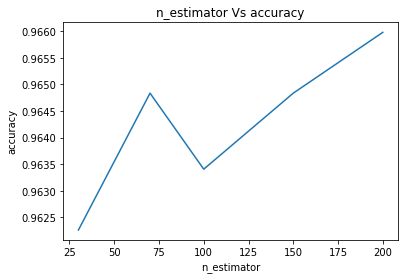

In [ ]:
#plot numbers of estimators Vs. accuracy scores
plt.plot([30,70,100,150,200],scores)
plt.title('n_estimator Vs accuracy')
plt.xlabel('n_estimator')
plt.ylabel('accuracy')  

**So, the highest accuracy is at n = 200**

### **Train random forest with estimator = 200**

Accuracy  0.965980560320183
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       363
           1       0.90      0.92      0.91       364
           2       0.93      0.99      0.95       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       1.00      0.94      0.97       335
           6       1.00      1.00      1.00       336
           7       0.99      0.90      0.94       364
           8       0.95      1.00      0.97       336
           9       0.95      0.99      0.97       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


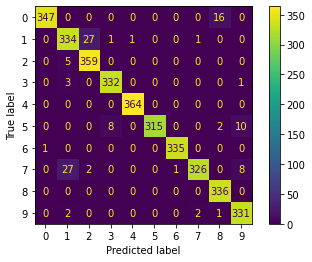

In [ ]:
rf = RandomForestClassifier(n_estimators=200,random_state=0)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('Accuracy ', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(rf,x_test,y_test)

## **Train Boosting Classifier**

Boosting is an ensemble technique that attempts to create a strong classifier from a number of weak classifiers.

Accuracy  0.9588336192109777
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.90      0.92      0.91       364
           2       0.92      0.99      0.95       364
           3       0.97      0.98      0.97       336
           4       0.99      0.99      0.99       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.98      0.89      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.96      0.94       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9625500285877644
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.91      0.93      0.92       364
           2       0.94      0.99      0.96       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.91      0.96      0.93       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.961978273299028
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.90      0.94      0.92       364
           2       0.94      0.99      0.96       364
           3       0.97      0.99      0.97       336
           4       1.00      1.00      1.00       364
           5       0.99      0.92      0.95       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.96      0.94       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9625500285877644
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       363
           1       0.90      0.94      0.92       364
           2       0.94      0.99      0.96       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.92      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.96      0.95       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


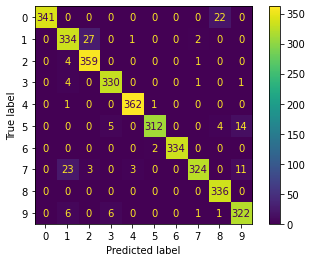

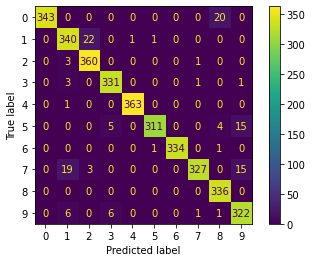

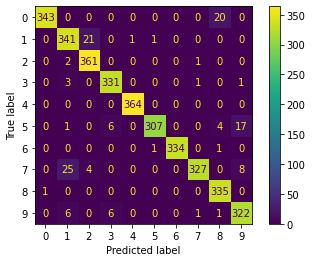

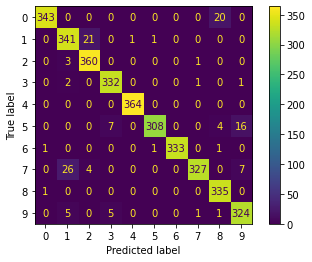

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
scores_1 =[]
for i in [70,100,150,200]:
  gb = GradientBoostingClassifier(n_estimators=i,random_state=0)
  gb.fit(x_train,y_train)
  y_pred = gb.predict(x_test)
  print('Accuracy ', accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  plot_confusion_matrix(gb,x_test,y_test)
  scores_1.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'accuracy')

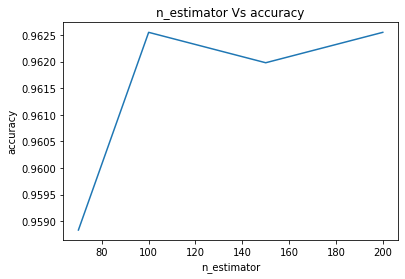

In [ ]:
#plot numbers of estimators Vs. accuracy scores
plt.plot([70,100,150,200],scores_1)
plt.title('n_estimator Vs accuracy')
plt.xlabel('n_estimator')
plt.ylabel('accuracy')  

**So, the highest accuracy score is at n estimator = 100**

### **Train the boosting classifier at n estimator = 100 and with range [0.1:0.9]**

Accuracy  0.9625500285877644
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.91      0.93      0.92       364
           2       0.94      0.99      0.96       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.91      0.96      0.93       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9654088050314465
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.91      0.95      0.93       364
           2       0.95      0.99      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.97      0.95       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9648370497427101
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.89      0.96      0.92       364
           2       0.96      0.99      0.98       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.91      0.95       335
           6       1.00      1.00      1.00       336
           7       0.99      0.89      0.94       364
           8       0.93      1.00      0.96       336
           9       0.94      0.97      0.95       336

    accuracy                           0.96      3498
   macro avg       0.97      0.97      0.96      3498
weighted avg       0.97      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.9556889651229273
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.88      0.93      0.90       364
           2       0.95      0.98      0.96       364
           3       0.96      0.98      0.97       336
           4       1.00      0.99      0.99       364
           5       0.97      0.91      0.94       335
           6       0.99      1.00      0.99       336
           7       0.98      0.88      0.93       364
           8       0.93      1.00      0.96       336
           9       0.91      0.95      0.93       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


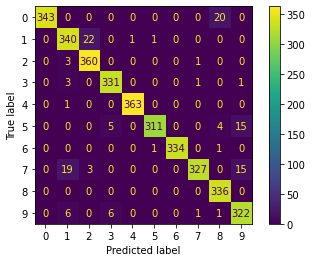

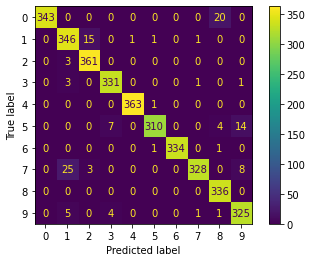

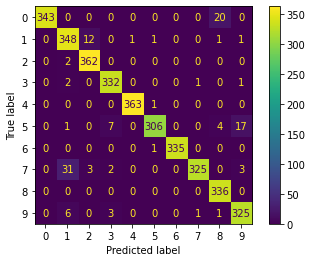

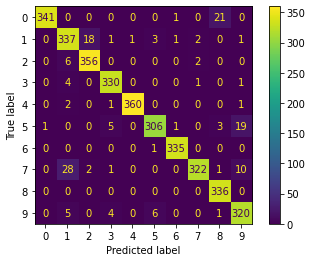

In [ ]:
scores_2 =[]
for i in [0.1,0.3,0.5,0.7]:
  gb = GradientBoostingClassifier(n_estimators=100,learning_rate=i,random_state=0)
  gb.fit(x_train,y_train)
  y_pred = gb.predict(x_test)
  print('Accuracy ', accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  plot_confusion_matrix(gb,x_test,y_test)
  scores_2.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'accuracy')

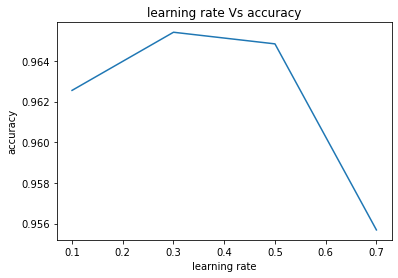

In [ ]:
#Plot the learning rate Vs. accuracy scores
plt.plot([0.1,0.3,0.5,0.7],scores_2)
plt.title('learning rate Vs accuracy')
plt.xlabel('learning rate')
plt.ylabel('accuracy')

**So, the best accuracy is when number of estimator = 100 and with learning rate = 0.3**

#### **Train Boosting classifier with n_estimators=100,learning_rate=0.3**

Accuracy  0.9654088050314465
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.91      0.95      0.93       364
           2       0.95      0.99      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.97      0.95       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


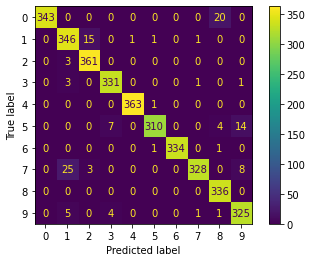

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.3,random_state=0)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('Accuracy ', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(gb,x_test,y_test)

##**Apply XGBOOST classification model with n_estimators=100,learning_rate=0.3**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

Accuracy  0.9668381932532876
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.90      0.94      0.92       364
           2       0.95      0.99      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.96      0.98       335
           6       1.00      1.00      1.00       336
           7       0.99      0.89      0.93       364
           8       0.94      1.00      0.97       336
           9       0.95      0.97      0.96       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


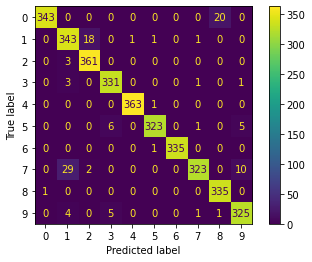

In [ ]:
import xgboost as xg
xgb = xg.XGBClassifier(n_estimators=100,learning_rate=0.3,random_state=0)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print('Accuracy ', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(xgb,x_test,y_test)

## **comparing between the models**

After comparing the models with each other, we noticed that the decision tree model is the lowest accuracy, which is 0.92, and the SVM model is the highest accuracy, which is 0.98

After applying soft voting and hard voting, the hard voting is the best, which have accuracy = 0.94, and the soft voting is the worst, which have accuracy = 0.92.

After comparing bagging and boosting, the best accuracy is boosting classifier, which have accuracy = 0.965

When comparing the XGBOOST model(with the best number of estimator and hyperparameter like the boosting classifier) with Gradient Boosting classifier, the accuracy of XGBOOST is the higher which ism =  0.9668